##### NAME : Laiba Adnan 004
##### Class : BSDS 4A
##### Subject : PAI LAB

In [60]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load Data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

First 5 rows:
   CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0      False  39.0  False          0.0        0.0           0.0     0.0   
1      False  24.0  False        109.0        9.0          25.0   549.0   
2      False  58.0   True         43.0     3576.0           0.0  6715.0   
3      False  33.0  False          0.0     1283.0         371.0  3329.0   
4      False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  Transported  CabinNum  ...  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  \
0     0.0        False       0.0  ...   False    True   False   False   False   
1    44.0         True       0.0  ...   False   False   False   False   False   
2    49.0        False       0.0  ...    True   False   False   False   False   
3   193.0        False       0.0  ...    True   False   False   False   False   
4     2.0         True       1.0  ...   False   False   False   False   False   

   Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0   

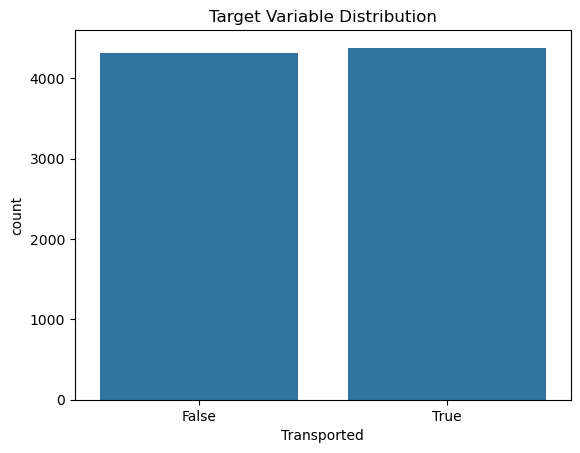

In [93]:


print("First 5 rows:")
print(train.head())

print("\nDataset Info:")
print(train.info())

print("\nStatistical Summary:")
print(train.describe())

print("\nMissing Values:")
print(train.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Transported', data=train)
plt.title("Target Variable Distribution")
plt.show()

### Preprocessing - Train

In [94]:
print(test.columns)

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'CabinNum', 'TotalSpending', 'CryoAge',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Unknown', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Destination_Unknown', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S'],
      dtype='object')


In [95]:
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Split Features & Target

In [108]:


y = train["Transported"]
X = train.drop("Transported", axis=1)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Random Forest Model

In [109]:

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)
# Validation Accuracy
y_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))



Validation Accuracy: 0.8004600345025877
Confusion Matrix:
 [[692 169]
 [178 700]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.80      0.80       861
        True       0.81      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### Preprocessing - Test

In [110]:


spend_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in ['Age', 'CryoSleep', 'VIP']:
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median() if test[col].dtype != bool else False)

for col in spend_cols:
    if col in test.columns:
        test[col] = test[col].fillna(0)


for col in ['HomePlanet','Destination']:
    if col in test.columns:
        test[col] = test[col].fillna('Unknown')


if 'Cabin' in test.columns:
    test[['Deck','CabinNum','Side']] = test['Cabin'].str.split('/', expand=True)
    test['CabinNum'] = pd.to_numeric(test['CabinNum'], errors='coerce').fillna(0)


test.drop(['PassengerId','Name','Cabin'], axis=1, errors='ignore', inplace=True)


for col in spend_cols:
    if col not in test.columns:
        test[col] = 0  
test['TotalSpending'] = test[spend_cols].sum(axis=1)
test['CryoAge'] = test['CryoSleep'] * test['Age']

test = pd.get_dummies(test)


test = test.reindex(columns=X.columns, fill_value=0)

In [111]:

for col in train.columns:
    if train[col].dtype == "object":
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

train = pd.get_dummies(train, drop_first=True)

print("After preprocessing shape:", train.shape)

After preprocessing shape: (8693, 30)


### Model Improvement

In [113]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)

print("Logistic Regression Accuracy:",
      accuracy_score(y_val, y_pred_lr))

Logistic Regression Accuracy: 0.7855089131684876


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:

predictions = rf.predict(test)

submission = pd.DataFrame({
    "PassengerId": test.index,  # Agar alag column ho to use karo
    "Transported": predictions
})

submission.to_csv("submission.csv", index=False)
print("Submission file ready! 🎉")

Submission file ready! 🎉
